# Programming by Contract

## Thomas H Meyer
### Department of Natural Resources and the Environment
### University of Connecticut
### thomas.meyer@uconn.edu

Programming by contract (PBC) is a programming style that uses formal logic to help programmers write high-quality code.

There is a lot to PBC; it is an extensive paradigm and it is not fully implemented in Python. But Python supports one of its key elements: assertions. Assertions establish what the system's state must be at a particular place in the code. An assertion that prescribes the state of the system before a code body executes is called a $\bf precondition$. An assertion that prescribes the system state after a function executes is called a $\bf postcondition$. An assertion that prescribes the system state while a function executes is called an $\bf invariant$.

Adding preconditions and postconditions to your functions provides a contract with your user. The user promises to abide by the preconditions and thus your function knows the domains of its arguments. Your function promises to abide by the postconditions, which informs the user of your function's effect on the system state. In principle, code can be $\it proven$ correct using assertions like these. In practice, it is a powerful debugging and documentation tool.

$\bf Definition: $ A `logical assertion' is a boolean-valued expression. It is any expression whose return value is True or False. In python, this includes all expressions that have a comparison operator$...$

In [2]:
'eggs' < 'spam'

True

$...$ or a membership test and the like.

In [3]:
8 in (1,8,7,3,9,'spam')

True

### Assertions, preconditions, postconditions

A $\bf precondition$ is a logical assertion of some system state that must be true (or false) before some other code block can be executed correctly.

Functions can be written to validate their inputs, to determine whether they satisfy all the algorithm's preconditions. In python, this test can be done using if-statements for very complicated preconditions, but simpler cases can be handled using the assert($...$) statement.

In [4]:
assert(8>5)

If an assertion is true, nothing happens. All is well and execution proceeds without interuption.

If an assertion fails, python raises and exception.

In [5]:
assert(8<5)

AssertionError: 

The assertion statement has an optional additional expression that is printed by the exception.

In [6]:
assert(8<5), 'wicked helpful assertion string'

AssertionError: wicked helpful assertion string

Let's write a function that could use some assertions. Here's a function that converts a temperature in degrees Kelvin to Celsius, so it requires that its input temperature not be a negative number. I advocate adding the assertions to the documentation string so the function's users know the terms of the contract.

In [7]:
def K2C(tK):
    """
    Convert degrees K to C.
    Argument: tK is a temperature in degrees K.
    Precondition: (tK > 0)
    """
    assert tK > 0, 'tK is negative'
    return tK - 273.15

Here's what the documentation string gives.

In [8]:
help(K2C)

Help on function K2C in module __main__:

K2C(tK)
    Convert degrees K to C.
    Argument: tK is a temperature in degrees K.
    Precondition: (tK > 0)



Let's try it with an invalid input.

In [9]:
K2C(-4)

AssertionError: tK is negative

The input argument needs to be numeric, so we should perform type checking on it. There are several types of numbers that are allowed: integers, long integers, and floats -- but not complex numbers. We could test for them individually with a string of $or$ clauses, but there's a better way. Define a tuple of the allowed types and test for membership in that tuple. 

Python's isinstance($thing, type$) function returns True if and only if $thing$ is a $type$.

In [10]:
NumberTypes = (int, long, float)
isinstance(8, NumberTypes)

True

In [11]:
isinstance('spam!', NumberTypes)

False

We'll add in the type checking. It logically goes before the assertion about tK's value but, interestingle, that assertion itself does not fail if tK isn't numeric!

In [1]:
assert 'spam' > 0

Interestingly, it does fail for a check less than zero.

In [2]:
assert 'spam' < 0

AssertionError: 

In [12]:
NumberTypes = (int, long, float)

def K2C(tK):
    """
    Convert degrees K to C.
    Argument: tK is a temperature in degrees K.
    Preconditions: (tK is an int or long int or float) and (tK > 0)
    """
    assert isinstance(tK, NumberTypes), 'tK must be numeric'
    assert tK > 0, 'tK is negative, which is not allowed'
    return tK - 273.15

In [13]:
K2C('hello world!')

AssertionError: tK must be numeric

The assert error message can be made more informative by using a str format like this.

In [4]:
NumberTypes = (int, long, float)

def K2C(tK):
    """
    Convert degrees K to C.
    Argument: tK is a temperature in degrees K.
    Preconditions: (tK is an int or long int or float) and (tK > 0)
    """
    assert isinstance(tK, NumberTypes), 'tK must be numeric'
    assert tK > 0, 'tK is negative ({0}), which is not allowed'.format(tK)
    return tK - 273.15

In [5]:
K2C(-5)

AssertionError: tK is negative (-5), which is not allowed

A $\bf postcondition$ is a system state that is guaranteed to be true after a function finishes executing. Postconditions should be placed after all state-changing expressions. They give the user peace of mind that the function has, in fact, fufilled its promises and things may proceed.

In [14]:
NumberTypes = (int, long, float)

def K2C(tK):
    """
    Convert degrees K to C.
    Argument: tK is a temperature in degrees K.
    Preconditions: (tK is int or long int or float) and (tK > 0)
    Postconditions: (result is a float in Celsius)
    """
    assert isinstance(tK, NumberTypes), 'tK must be numeric'
    assert tK > 0, 'K2C: tK is negative, which is not allowed'
    
    result = tK - 273.15 # conversion to Celsius
    
    assert isinstance(result, float), 'the result must be a float'
    return result

In [15]:
K2C(288)

14.850000000000023

##Functions as arguments to other functions

Some functions take other functions as their arguments. For example, in SciPy there are functions that find minima of other functions, and (obviously) they need to know which function to work on.

scipy.optimize.minimize_scalar

So, let's load this to see how it works.

In [16]:
import scipy
help(scipy.optimize.minimize_scalar)

AttributeError: 'module' object has no attribute 'optimize'

In [17]:
'WAT '* 12

'WAT WAT WAT WAT WAT WAT WAT WAT WAT WAT WAT WAT '

The issue here is the scipy is gignormous and it would take forever to load the whole thing -- and we only need the one routine. So, we need to load it specifically. Well, actually we load the optimize package in which the needed function resides.

In [18]:
from scipy import optimize
help(scipy.optimize.minimize_scalar)

Help on function minimize_scalar in module scipy.optimize._minimize:

minimize_scalar(fun, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)
    Minimization of scalar function of one variable.
    
    Parameters
    ----------
    fun : callable
        Objective function.
        Scalar function, must return a scalar.
    bracket : sequence, optional
        For methods 'brent' and 'golden', `bracket` defines the bracketing
        interval and can either have three items `(a, b, c)` so that `a < b
        < c` and `fun(b) < fun(a), fun(c)` or two items `a` and `c` which
        are assumed to be a starting interval for a downhill bracket search
        (see `bracket`); it doesn't always mean that the obtained solution
        will satisfy `a <= x <= c`.
    bounds : sequence, optional
        For method 'bounded', `bounds` is mandatory and must have two items
        corresponding to the optimization bounds.
    args : tuple, optional
        Extra argumen

Let's try it on $(x-1)^2$. We don't want to bother to write a formal, named function like for this. We don't need a function with a name to compute (x - 1)**2, so this is a perfect place for a lambda function.

In [19]:
scipy.optimize.minimize_scalar(lambda x, (x-1)**2)

  fun: 0.0
 nfev: 5
  nit: 4
    x: 1.0

The value that minimizes the function is returned as the x attribute. It is 1.0, as expected.

Let's write a function of our own that takes another function as its argument.

In [20]:
def justAnotherFunction(x): 
    print 'yo. in justAnotherFunction'
    return x

def weirdFunc(f):
    print f
    return None

weirdFunc(justAnotherFunction)

<function justAnotherFunction at 0x0000000004ADDF98>


The function itself is passed into weirdFunc. Here's other examples.

In [21]:
weirdFunc(lambda x: (x-1)**2)

<function <lambda> at 0x0000000004AE7048>


This might bake your noodle, but we can pass a function to itself.

In [22]:
weirdFunc(weirdFunc)

<function weirdFunc at 0x0000000004ADDF28>


We can execute the function we passed in. Inside the weirdFunc function, the argument function is named "f" so we execute it in the usual way: f($...$)

In [23]:
def weirdFunc(f):
    return f(4)

weirdFunc(justAnotherFunction)

yo. in justAnotherFunction


4

### Parametric functions

We're heading towards writing a function, like minimize_scalar, that operates magickally on input functions. Our function will calculate the arclength of n-dimensional paramtetric curves. Super cool. So, let's review parametric functions now.

Let's plot a parametric function $f(t) = t^2$ for $t \in [0,1)$

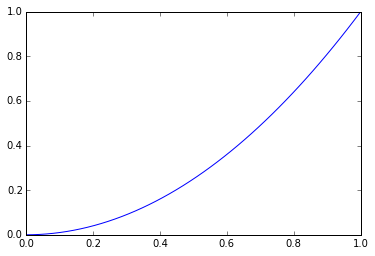

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def myPlot(yf, npts = 50):
    T = np.linspace(0,1,npts)
    y = [yf(t) for t in T]
    return plt.plot(T, y)

myPlot(lambda t: t**2)

Let's plot a parametric function of two functions: $f(t) = \{\sin t, \cos t\}$ and, here, we'll use the numpy functions sin and cos

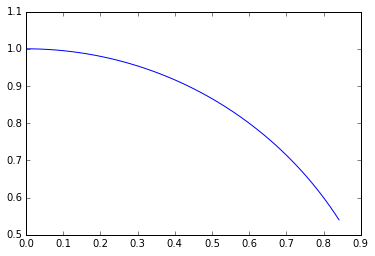

In [25]:
def myPlot(xf, yf, npts = 50):
    T = np.linspace(0,1,npts)
    x = [xf(t) for t in T]
    y = [yf(t) for t in T]
    return plt.plot(x, y)

myPlot(np.sin, np.cos)

Here's a function that implements two-dimensional parametric functions: $f(t) = \{x(t), y(t)\}$

In [26]:
def parametricFunc(xf, yf, t):
    """
    Evaluate a parametric function {x(t), y(t)}
    Arguments: 
        xf is a function of one argument that will be evaluated at t.
        yf is a function of one argument that will be evaluated at t.
        t is a float
    Preconditions: (t is a float)
    """
    assert isinstance(t, float), 't must be a float'
    return np.array([xf(t), yf(t)])

parametricFunc(np.sin, np.cos, 0.5)

array([ 0.47942554,  0.87758256])

The beautiful thing about parametric functions is that they are functions (mathematically speaking) of the parameter, but not of the spatial coordinates. So we can have curves of any shape.

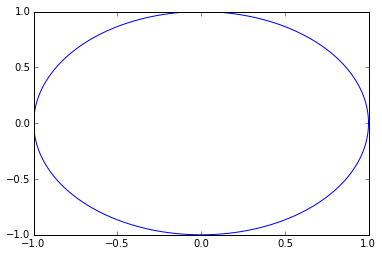

In [27]:
T = np.linspace(0, 2*np.pi, 200)
pnts = np.array([parametricFunc(np.sin, np.cos, t) for t in T])
x=pnts[:,0]
y=pnts[:,1]
plt.plot(x,y)

Final example: here's a function that implements a parametric function of any (finite) dimension. It takes a list of functions for its first argument. For example

parametricFuncND( [np.sin, np.cos], 0.5)

In [28]:
def parametricFuncND(listOfFunctions, t):
    """
    Evaluate  a parametric function of any (finite) dimension
    Arguments: 
        listOfFunctions is a list of functions of one value that will be evaluated a t.
        t is a float in [0,1]
    Preconditions: (t is a float)
    """
    assert isinstance(t, float), 't must be a float'
    assert len(listOfFunctions) > 0, 'the list of functions must have at least one function'
    return np.array([f(t) for f in listOfFunctions])

parametricFuncND([np.sin, np.cos, lambda x: x**2 - 3.0 * x], 0.5)

array([ 0.47942554,  0.87758256, -1.25      ])

##Recursion

Recursion is a programming style in which a problem is solved by first solving a smaller problem of the same type. Recursive problems often look like this:

$s_{i} = s_{i-1} + x$,

which means the next state $s_{i+1}$ equals the previous state $s_i$ plus something else that does not depend on the previous state $x$.

Example: find the sum of $n$ integers $1 + 2 + ...+ \, n$

A simple for loop does this easily.

In [29]:
total = 0 # initialize the summand

n = 5

for i in range(1,n+1):
    total += i
    
total

15

Easy enough. To solve this problem recursively, let's write it as an iterated function, as above. Suppose we have a magick function named TOTAL(n) that returns the sum of $1...n$. Clearly

TOTAL(0) = 0

and we can solve the problem like this using the magick function

TOTAL(n) = TOTAL(n-1) + n

In [30]:
def TOTAL(n):
    """
    compute the summation of [1...n]
    """
    if n == 0: 
        return 0
    else:
        return TOTAL(n-1) + n

In [31]:
TOTAL(5)

15

At first, recursion seems like complete magick. It's as if the program DOESN'T DO ANYTHING yet it computes the answer. There are no iteration variables, no intermediate results (it seems) -- just the answer. But a little reflection on how python executes this function might shed some light. There are intermediate results that are held on the execution stack. Those results are the values the variable n is given each time TOTAL is called. (Remember that n is $\it local$ to the instance of its invocation, so every invocation of TOTAL gets its own private copy of n. For TOTAL(3) the execution stack looks like this

TOTAL(3) = TOTAL(2) + 3

TOTAL(2) = TOTAL(1) + 2

TOTAL(1) = TOTAL(0) + 1

TOTAL(0) = 0 so

TOTAL(1) = TOTAL(0) + 1 = 0 + 1 = 1

TOTAL(2) = TOTAL(1) + 2 = 1 + 2 = 3

TOTAL(3) = TOTAL(2) + 3 = 3 + 3 = 6

In [32]:
TOTAL(3)

6

Example: Fibonnaci series is $f_n = f_{n-1} + f_{n-2}$ with $f_0 = 0$ and $f_1 = 1$

The implementation literally codes the mathematical definition into python syntax. I've also added an option flag argument that turns off the print statement by default. (I call this f0 because I'm going to implement it several times and I want to give them different names.)

In [33]:
def f0(n, verbose=False):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        f1 = f0(n-1, verbose)
        if verbose: print 'f(n-1) = f(', n-1, ') =', f1
        f2 = f0(n-2, verbose)
        if verbose: print 'f(n-2) = f(', n-2, ') =', f2
        return f1 + f2

In [37]:
f0(4, True)

f(n-1) = f( 1 ) = 1
f(n-2) = f( 0 ) = 0
f(n-1) = f( 2 ) = 1
f(n-2) = f( 1 ) = 1
f(n-1) = f( 3 ) = 2
f(n-1) = f( 1 ) = 1
f(n-2) = f( 0 ) = 0
f(n-2) = f( 2 ) = 1


3

In [38]:
%timeit f0(10)

10000 loops, best of 3: 36.3 µs per loop


This list comprehension produces the Fibonacci sequence.

In [ ]:
[f0(n) for n in range(6)]

The print statements reveal that the algorithm is wicked inefficient. For f(4), f(2) is called twice, and f(1) is called three times. Try f(5) and you'll start to see that the redundancy problem is growing out of control. A little algebra shows how the problem arises.

$f_n = f_{n-1} + f_{n-2} \hspace{2 cm}$ and

$f_{n-1} = f_{n-2} + f_{n-3} \hspace{1.7 cm}$ so substituting for $f_{n-1}$

$f_n = (f_{n-2} + f_{n-3}) + f_{n-2}$

$f_n = 2 \, f_{n-2} + f_{n-3}$

To solve the problem, $f_{n-2}$ is called twice at each step. However, this also shows the solution. We'll change the implementation so that f(n) returns both f(n) and f(n-1) as a tuple. This implementation not only does not have redundant invocations, it skips every other call! 

In [40]:
def f1(n, verbose=False):
    if verbose: print 'f1(', n, ')'
    if n == 1 or n == 0:
        return 1,0 # return a tuple. Notice that parentheses are not needed here
    else:
        # note the multiple assignment. the LHS is also a tuple, appearances notwithstanding
        f2, f3 = f1(n-2, verbose) 
        return 2*f2 + f3, f2

In [41]:
f1(4, True)

f1( 4 )
f1( 2 )
f1( 0 )


(5, 2)

The function returns a tuple instead of the one single number, which is slightly annoying. One quick fix is to just tack on a [0] to the function invocation to pick out only the first number.

In [42]:
f1(1000)[0]

208484302383602761327318314157481124218671703953860963847005781163880495422212218705895784975445132954453283071549069573566561456132420527702634287255875261898108634086825602779700668110253165L

This alogrithm is wicked fast. If you try to compute f(1000) with the first-try implementation, python's stack goes too deep and throws and overflow exception -- it can't even solve the problem! Also notice how python quietly changed to arbitrary precision arithematic when the size of the number grew larger than what can be represented with machine arithemtic. Slicker than frog's fur.

Let's see how much faster this implementation is.

In [43]:
%timeit f1(10)

The slowest run took 4.52 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.55 µs per loop


In [44]:
36.2/1.58

22.911392405063292

###Base cases

All recursive functions have a $\bf base$ $\bf case$. A base case is a value (or values) the function returns without needing to resort to deeper recursion. Without a base case, the recursion never stops and the program gets in to an infinite loop. In the summation problem, the base case was zero. In the Fibonnaci problem, the base cases were one and zero. So, when you're designing a recursive algorithm, make sure you recognize the base case(s) and include in your code.

#### Exercise

Write two functions to compute the factorial function x!

$x!_n = x!_{n-1} \times n$

Write your first function using a For loop. Write your second function using recursion.

#### Harder exercise

Write a function to produce a Fibonnaci number without using recursion.

#Capstone Example: Arclength

In summary, to this point we've seen how assertions and mindful documentation improve code reliability and readability, how we can write functions that take functions as arguments allows us to write very general-purpose code, and how recursion works. However, although the previous examples might be helpful to see how recursion works, they are possibly not completely convincing that it makes (at least some) tasks easier. This notebook concludes with a non-trivial example of a real-world numerical methods problem. We shall write a function that computes the arclength of an user-provided parametric curve with any finite number of dimensions.

Let's define arclength so we know what we're talking about. Arclength is the length a curve would have if all its curvature was removed without stretching it. If we had a real, physical curve (think about the railing of a spiral staircase), the arclength might be measured by laying a cloth tape on the curve and adding up the measures.

This intuitive definition leads to a formal analog. Like many other calculus problems, the approach is to approximate the exact with ever decreasing linear approximations that approach the curved reality in the limit. Here, we will approximate the arclengths of segments of a curve with the lengths of  straight-line segments between the segments' endpoints.

For example, suppose we want to know the arclength $s$ of $y = x^2$ from $x = 0$ to $x = 2$

Here's the points to plot. Notice how we can square the x-values without a loop construct because numpy can broadcast operations over iteratable data structures, like lists.

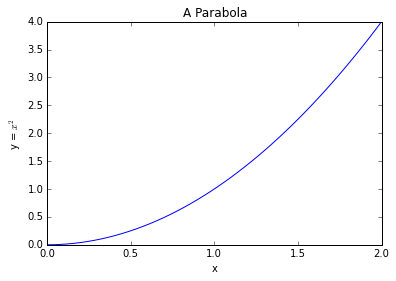

In [45]:
x = np.linspace(0,2,50,endpoint=True)
plt.plot(x,x**2)
plt.xlabel('x')
plt.ylabel('y = $x^2$')
plt.title('A Parabola')

Here's what the zero-order approximation looks like.

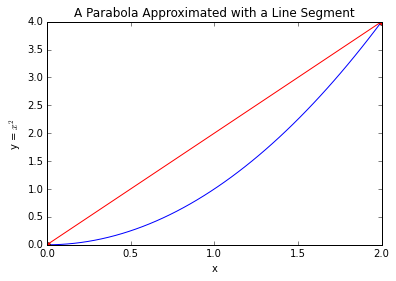

In [46]:
x = np.linspace(0,2,50,endpoint=True)
x0 = 0
x1 = 2
plt.plot(x,x**2)
plt.plot([x0,x1],[x0,x1**2],'ro')
plt.plot([x0,x1],[x0,x1**2],'r-')
plt.xlabel('x')
plt.ylabel('y = $x^2$')
plt.title('A Parabola Approximated with a Line Segment')

The length of the approximation is $\sqrt((2-0)^2 + (4-0)^2)$

In [47]:
np.sqrt(2**2 + 4**2)

4.4721359549995796

It happens that a closed-form solution exists for this problem: $s = \sqrt(17) + \frac{{\rm asinh} (4)}{4} \approx 4.64678$. Notice that the approximation is less than the true value. This is $always$ true (think about the triangle inequality), which means we can use that as an invariant in our code. The next iteration looks like this.

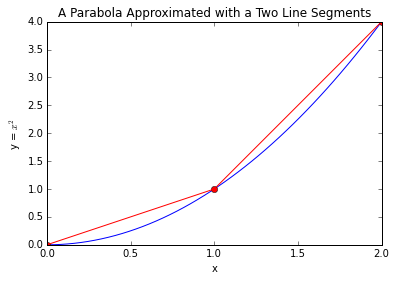

In [48]:
x = np.linspace(0,2,50,endpoint=True)
x0 = 0
xm = 1
x1 = 2
plt.plot(x,x**2)
plt.plot([x0,xm,x1],[x0,xm**2,x1**2],'ro')
plt.plot([x0,xm,x1],[x0,xm**2,x1**2],'r-')
plt.xlabel('x')
plt.ylabel('y = $x^2$')
plt.title('A Parabola Approximated with a Two Line Segments')

The next iteration step's approximation is...

In [49]:
s1 = np.sqrt((1-0)**2 + (1-0)**2)
s2 = np.sqrt((1-0)**2 + (4-1)**2)
print s1, '+', s2, '=', s1+s2

1.41421356237 + 3.16227766017 = 4.57649122254


This approximation is better than what we got from the first, as expected. To generalize,

$s \approx \sum_{i = 0}^{n-1} \sqrt( (x_{i+1} - x_i)^2 + (y_{i+1} - y_i)^2)$

in which the saavy reader will recognize Pythagoras's famous formula. In the limit we have

$s = \int_{t_0}^{t_1} \sqrt({\rm d} x^2 + {\rm d} y^2)$

Close inspection of this integral often invokes fear and loathing. Not only is it a single integral over two infintesimals, the infintesimals appear in a highly nonlinear way. This often leads to a hard calculus problem. By "hard" I mean "impossible". (For the mathematicians, try solving this integral for a circular quadrant to derive $p = 2\,\pi\, r$. Hint: remember the integral of the arcsine.)

Notice the integration limits. The defintion suggests that the infintesimals ought to be functions of the parameter $t$

$s = \int_{t_0}^{t_1} \sqrt({\rm d} x(t)^2 + {\rm d} y(t)^2)$

So, let's write a function that computes Pythagoras's formula from two points.

In [50]:
NumberTypes = (int, long, float)
nptype = type(np.array([])) # let python tell me the name of the numpy array

def pythag(p1, p2):
    """
    Compute the straight-line distance from p1 to p2.
    Arguments:
        p1 is an numpy array of any dimension. It's elements are numeric.
        p2 is an numpy array of any dimension same as p1. It's elements are numeric.
    Preconditions:
        (p1 is not empty) and (p1's elements are numeric)
        (p2 is not empty) and (p2's elements are numeric) and (p2 has the same length as p1)
        p1 and p2 are one-dimensional (vectors, not matrices)
    Postcondition:
        (result is a non-negative) and (result is a float)
    """
    assert(isinstance(p1, nptype))
    assert(isinstance(p2, nptype))
    
    assert(len(p1) > 0)
    assert(len(p1) == len(p2))
    for i in range(len(p1)):
        assert(isinstance(p1[i], NumberTypes))
        assert(isinstance(p2[i], NumberTypes))
        
    result = np.sqrt(sum((p2 - p1)**2))
    
    assert(result >= 0) # this does both post conditions in one check
    return result
    
pythag(np.array([0,0]), np.array([2,4]))

4.4721359549995796

The arclength function takes an array of parametric lambda functions, t0, t1, and a convergence tolerance. Here's how we use a lambda function inside our routine.

In [51]:
x = lambda t: t**2
x(8)

64

The following function is executed in our base case. It calculates the length of a segment.

In [52]:
def arclenSegment(curves, t0, t1):
    p0 = np.array([c(t0) for c in curves])
    p1 = np.array([c(t1) for c in curves])
    length = pythag(p0, p1)
    return length

Let's try it

In [53]:
arclenSegment([lambda t: t, lambda t: t**2], 0.0, 2.0)

4.4721359549995796

Same code works for curves of any dimension

In [54]:
arclenSegment([lambda t: t, lambda t: t**2, lambda t: t**3], 0.0, 2.0)

9.1651513899116797

In [55]:
def arclen(curves, t0, t1, tol=0.001):
    assert(t0 < t1), 't0 must be less than t1'
    assert(tol > 0), 'tolerance must be positive'
    assert(len(curves) > 0), 'there must be at least one curve'
    
    dt = (t1 - t0)/2.0 # divide and conquer
    tm = t0 + dt
    if dt <= tol:
        return arclenSegment(curves, t0, t1)
    else:
        return arclen(curves, t0, tm, tol) + arclen(curves, tm, t1, tol)

In [56]:
arclen([lambda t: t, lambda t: t**2], 0.0, 2.0)

4.6467834540329394

This agrees to the exact answer to at least five significant digits. Here's a three-dimensional helical spiral.

In [57]:
arclen([lambda t: np.sin(2.0 * np.pi * t), lambda t: np.cos(2.0 * np.pi * t),lambda t: t,], 0.0, 2.0)

12.724452390352511